# Singular Value Decomposition

Every matrix $\mathbf{X}$ of size $m \times n$ can be decomposed as a product of 3 matrices $\mathbf{U} \Sigma \mathbf{V}^*$, where
- $\mathbf{U}$ represents the $m \times m$ matrix with the eigenvectors of $\mathbf{X}\mathbf{X}^T$ in its columns.
- $\mathbf{V}$ represents the $n \times n$ matrix with the eigenvectors of $\mathbf{X}^T\mathbf{X}$ in its columns.
- Both $\mathbf{U}$ and $\mathbf{V}$ are unitary, meaning that their inverses $\mathbf{U}^{-1}, \mathbf{V}^{-1}$ equal their conjugate transposes $\mathbf{U}^{*}, \mathbf{V}^{*}$, such that
$$
    \mathbf{U}^{*}\mathbf{U} = \mathbf{U}\mathbf{U}^{*} = I_{m \times m}, \qquad \mathbf{V}^{*}\mathbf{V} = \mathbf{V}\mathbf{V}^{*} = I_{n \times n}
$$
- $\Sigma$ represents the $m \times n$ diagonal matrix with the $k = \min(m, n)$ **singular values**, $\lambda_i, i = 1, \dots, k$ on its diagonal that are the square roots of the nonzero eigenvalues of both $\mathbf{X}^T\mathbf{X}$ and $\mathbf{X}\mathbf{X}^T$. 

The matrix $\mathbf{X}$ can thus be decomposed as
$$
    \mathbf{X} = \mathbf{U} \Sigma \mathbf{V}^*
$$

*Note on conjugate transpose*:

The conjugate transpose matrix, also known as Hermitian transpose, of an $m \times n$ complex-valued matrix $\mathbf{A}$ is an $n \times m$ matrix obtained by transposing $\mathbf{A}$ and applying complex conjugation to each entry
$$
    \mathbf{A}_{ij}^* = \text{conj}(\mathbf{A}_{ji})
$$
where $\text{conj}(a + bi) = a - bi$. If $\mathbf{A} \in \mathbb{R}^{m \times n}$, then $\mathbf{A}^* = \mathbf{A}^T$. 

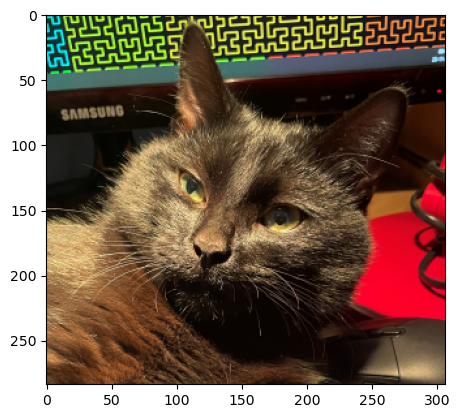

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio.v3 as iio

im = iio.imread("../datasets/image_sample/kat.png")

plt.imshow(im)

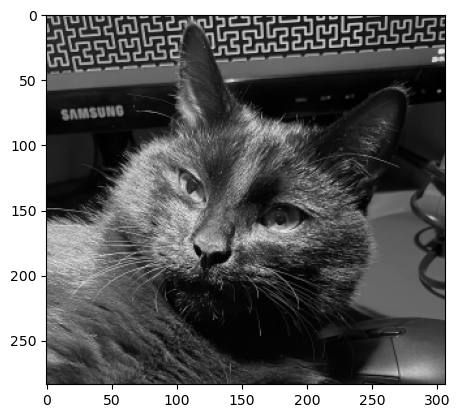

In [7]:
gray_im = im.sum(-1)/4
plt.imshow(gray_im, cmap=plt.get_cmap('gray'))

## Numpy implementation

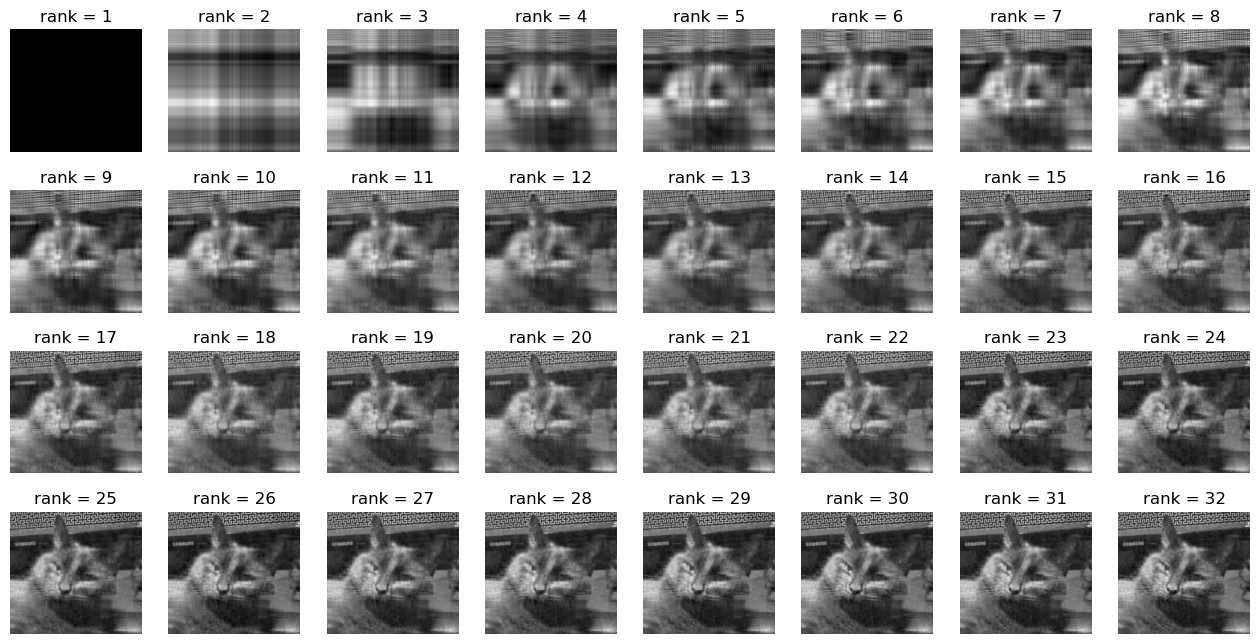

In [8]:
u, s, vh = np.linalg.svd(gray_im)

fig, axes = plt.subplots(4, 8, figsize=(16, 8))

axes = axes.flatten()

di = np.diag_indices(min(u.shape[0], vh.shape[0]))
S = np.zeros((u.shape[0], vh.shape[0]))
S[di] = s

for i in range(len(axes)):
    axes[i].imshow(u[:, :i] @ S[:i, :i] @ vh[:i, :], cmap=plt.get_cmap('gray'))
    axes[i].axis("off")
    axes[i].set_title(f"rank = {i+1}")

## SVD by hand

In contrast to `np.linalg.svd`, the eigenvectors returned by `np.linalg.eigh` for both $\mathbf{U}$ and $\mathbf{V}$ are not coupled in any way. Eigenvectors are in general not **unique**. Multiplying an eigenvector by -1 still gives a valid eigenvector. Therefore, there is a good chance of sign mismatch. 
A straightforward way to deal with this is to derive $\mathbf{U}$ in terms of $\mathbf{X} = \mathbf{U} \Sigma \mathbf{V}^*$:
\begin{align*}
    \mathbf{X} &= \mathbf{U} \Sigma \mathbf{V}^*\\
    \mathbf{X}\mathbf{V} &= \mathbf{U} \Sigma\\
    \mathbf{X}\mathbf{V}\Sigma^{-1} &= \mathbf{U}\\
    \mathbf{U} &= \mathbf{X}\mathbf{V}\Sigma^{-1}
\end{align*}

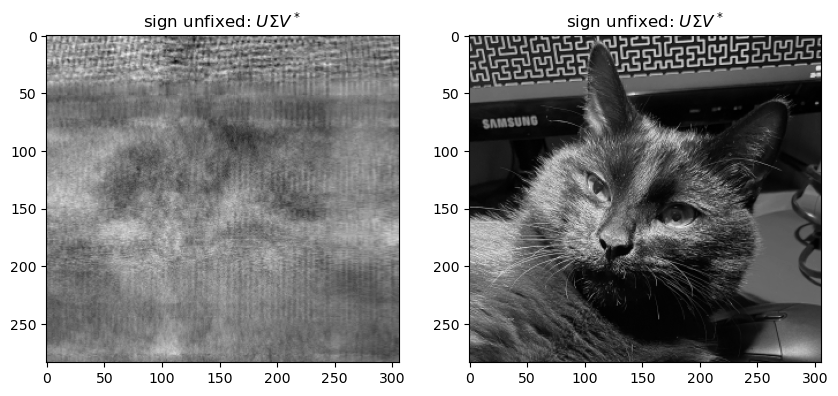

In [ ]:
X = gray_im

# compute eigenvalues and vectors for X X^T and X^T X, corresponding to U and V
u_eigvals, u = np.linalg.eigh(X @ X.T)
v_eigvals, v = np.linalg.eigh(X.T @ X)

# the eigenvalues in diagonal S are determined by the size of U and V
# S takes the eigenvalues from U or V that has the least amount of rows
if u.shape[0] < v.shape[0]:
    S = u_eigvals 
else:
    S = v_eigvals

# sort U and V according to their eigenvalues as indices
ind_u = np.argsort(u_eigvals)[::-1]
ind_v = np.argsort(v_eigvals)[::-1]
u = u[:, ind_u] 
v = v[:, ind_v]

# singular values are the square roots of eigenvalues
# but first, sort the eigenvalues from largest to smallest
S = np.sqrt(np.sort(S)[::-1])

# create diagonal indices
di = np.diag_indices(min(u.shape[0], v.shape[0]))
sigma = np.zeros((u.shape[0], v.shape[0]))
sigma[di] = S # assign singular values to diagonal

# manually compute inverse of sigma
sigma_inv = np.zeros((v.shape[0], u.shape[0])) # transpose
sigma_inv[di] = 1/S # reciprocal
# compute U to mitigate sign mismatch
u_sign_fixed = X @ v @ sigma_inv

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(u @ sigma @ v.T, cmap='gray')
axes[0].set_title(r"sign unfixed: $U \Sigma V^*$")

axes[1].imshow(u_sign_fixed @ sigma @ v.T, cmap='gray')
axes[1].set_title(r"sign unfixed: $U \Sigma V^*$")

plt.show()

In [14]:
X = np.array([
    [1, 2, 3],
    [4, 5, 6]   
], dtype='float64')

# svd_u, svd_s, svd_vh = np.linalg.svd(X)
# print(svd_u)
# print(svd_s)
# print(svd_vh)

u_eigvals, u = np.linalg.eigh(X @ X.T)
v_eigvals, v = np.linalg.eigh(X.T @ X)

if u.shape[0] < v.shape[0]:
    S = u_eigvals 
else:
    S = v_eigvals
    
ind_u = np.argsort(u_eigvals)[::-1]
ind_v = np.argsort(v_eigvals)[::-1]
u = u[:, ind_u] 
v = v[:, ind_v]

S = np.sqrt(np.sort(S)[::-1])

di = np.diag_indices(min(u.shape[0], v.shape[0]))
sigma = np.zeros((u.shape[0], v.shape[0]))
sigma[di] = S

u = X @ v @ np.linalg.pinv(sigma)

u @ sigma @ v.T 

array([[1., 2., 3.],
       [4., 5., 6.]])

## Moore-Penrose Pseudo inverse

If the matrix $\mathbf{X}$ is not invertible, then it becomes difficult to analytically solve for the system of linear equations
$$
    \mathbf{X}\mathbf{w} = \mathbf{y}
$$
where $\mathbf{X}$ and $\mathbf{y}$ are known and $\mathbf{w}$ is unknown. When $\mathbf{X}$ is either singular (determinant equals zero) or rectangular, there may be one, none, or infinitely many solutions, depending on the specific $\mathbf{b}$ and the column/row spaces of $\mathbf{X}$.  

There are in general two cases:
- **Under-determined**: where $\mathbf{X} \in \mathbb{C}^{m \times n}$ and $m \ll n$ (short-fat matrix), so that there are fewer equations than unknowns. This type of matrix usually spans all of $\mathbb{R}^n$, since it has more columns than required for a linearly independent basis. In such cases, it generally has infinitely many solutions for every $\mathbf{y}$ (due to the extra free variables). It is called under-determined because there are not enough values in $\mathbf{y}$ to uniquely determine the higher dimensional $\mathbf{w}$ vector.
- **Over-determined**: where $\mathbf{X} \in \mathbb{C}^{m \times n}$ and $m \gg n$ (tall-skinny matrix), so that there are more equations than unknowns. This matrix cannot have $n$ linearly independent columns, guaranteeing that there are $\mathbf{y}$ vectors that have no solution $\mathbf{w}$. 

In the over-determined case, when no solution exists, we would like to find a solution $\mathbf{w}$ that minimizes the sum-squared error $||\mathbf{X} \mathbf{w} - \mathbf{y}||_2^2$, the so-called *least squares* solution. In the under-determined case, when inifinite solutions exist, we would like to find the solution $\mathbf{w}$ with minimum norm $||\mathbf{w}||_2$ such that $\mathbf{X} \mathbf{w} = \mathbf{y}$, the so-called *minimum-norm* solution.

Using the SVD, we find a pseudo-inverse $\mathbf{X}^\dagger$ by inverting each operation. 
\begin{align*}
    \mathbf{X} &= \mathbf{U} \Sigma \mathbf{V}^*\\
    \mathbf{X}^\dagger &= (\mathbf{U} \Sigma \mathbf{V}^*)^{-1}\\
    \mathbf{X}^\dagger &= \mathbf{V} \Sigma^{-1} \mathbf{U}^*
\end{align*}
This pseudo-inverse may be used to find both the minimum-norm or the least squares solution:
$$
    \mathbf{w} = \mathbf{X}^\dagger \mathbf{y}
$$

In [24]:
def moore_pensore_inv(X: np.ndarray):
    u, s, vT = np.linalg.svd(X)

    di = np.diag_indices(min(u.shape[0], vT.shape[0]))
    S_inv = np.zeros((vT.shape[0], u.shape[0]))
    S_inv[di] = 1/s

    X_inv = vT.T @ S_inv @ u.T
    return X_inv

X = np.array([
    [1, 2, 3],
    [4, 5, 6]   
], dtype='float64')

X_inv = moore_pensore_inv(X)

X_inv

array([[-0.94444444,  0.44444444],
       [-0.11111111,  0.11111111],
       [ 0.72222222, -0.22222222]])

In [25]:
np.linalg.pinv(X)

array([[-0.94444444,  0.44444444],
       [-0.11111111,  0.11111111],
       [ 0.72222222, -0.22222222]])

In [26]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

X.shape, y.shape

((442, 10), (442,))

In [27]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y

beta

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [28]:
beta = np.linalg.pinv(X) @ y

beta

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [29]:
beta = moore_pensore_inv(X) @ y

beta

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

## Linear Regression in one dimension

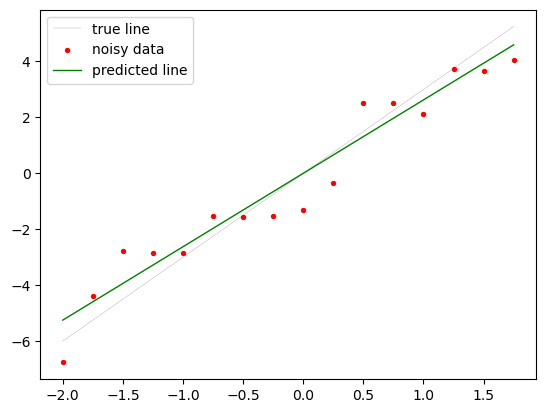

In [47]:
w = 3
x = np.arange(-2, 2, 0.25).reshape(-1, 1)
y = w * x + np.random.randn(*x.shape)

plt.plot(x, x*w, color='k', linewidth=0.1, label='true line')
plt.scatter(x, y, color='r', s=8, label='noisy data')

beta = moore_pensore_inv(x) @ y
y_pred = x @ beta

plt.plot(x, y_pred, color='g', linewidth=1, label='predicted line')

plt.legend()

In [49]:
beta, w

(array([[2.62487384]]), 3)

In [52]:
u, s, vT = np.linalg.svd(x, full_matrices=False)

di = np.diag_indices(min(u.shape[0], vT.shape[0]))
S_inv = np.zeros((vT.shape[0], u.shape[0]))
S_inv[di] = 1/s

vT.T.shape, S_inv.shape, u.T.shape

((1, 1), (1, 16), (1, 16))

In [53]:
u

array([[-0.43133109],
       [-0.37741471],
       [-0.32349832],
       [-0.26958193],
       [-0.21566555],
       [-0.16174916],
       [-0.10783277],
       [-0.05391639],
       [ 0.        ],
       [ 0.05391639],
       [ 0.10783277],
       [ 0.16174916],
       [ 0.21566555],
       [ 0.26958193],
       [ 0.32349832],
       [ 0.37741471]])

In [56]:
x/np.linalg.norm(x)

array([[-0.43133109],
       [-0.37741471],
       [-0.32349832],
       [-0.26958193],
       [-0.21566555],
       [-0.16174916],
       [-0.10783277],
       [-0.05391639],
       [ 0.        ],
       [ 0.05391639],
       [ 0.10783277],
       [ 0.16174916],
       [ 0.21566555],
       [ 0.26958193],
       [ 0.32349832],
       [ 0.37741471]])

In one dimension, finding $w$ via the pseudo-inverse $w = \mathbf{x}^\dagger \mathbf{y}$ corresponds to finding the scalar projection
$$
    w = \dfrac{\mathbf{x}^* \mathbf{y}}{||\mathbf{x}||_2^2} =  1 \cdot \dfrac{1}{||\mathbf{x}||_2} \dfrac{\mathbf{x}^*}{||\mathbf{x}||_2} \mathbf{y} = \mathbf{V} \Sigma^{-1} \mathbf{U}^* \mathbf{y}
$$